<a href="https://colab.research.google.com/github/N0z1/Image-Processing-Projects/blob/main/Intro_to_image_processing_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to image processing in google Colab
##  

1.   Upload files to process



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gundam_unicorn.jpg to Gundam_unicorn.jpg


2.   Extract the selected filename

In [ ]:
filename = 'NO SELECTION YET'
for fn in uploaded.keys() :
  filename = fn
print(filename)

Gundam_unicorn.jpg


3.)   Open <i>filename</i> and display it


*   <i>imread</i> loads image from file (decompressing it). It is stored into <i>img</i> which is a 3xHdimxVdim Numpy array.
*   <i>cvtColor</i> converts between colour spaces. Here it's used to change the order in the pixels colours from BGR (default in OpenCV) to RGB (default in operating systems).







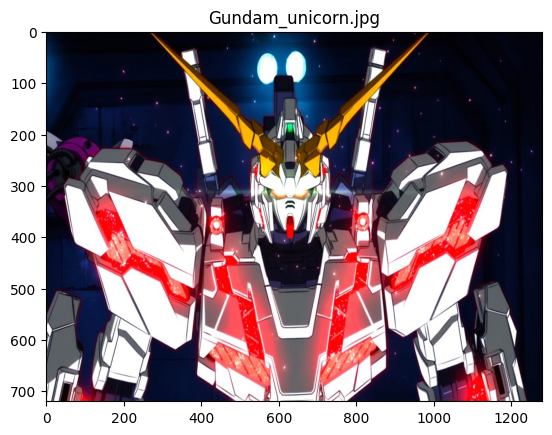

Hdim: 1280 ; Vdim: 720; Depth: 3
Pixel at row 20, column 10 value [R G B]: [ 3 22 52]
Pixel data type: uint8
Image size (bytes): Hdim x Vdim x Depth = 2764800


In [ ]:
from matplotlib import pyplot as plt
import cv2
if filename != ' NO SELECTION YET':
  img = cv2.imread(filename)
  img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
  #display with pyplot
  plt.imshow (img, aspect='auto')
  plt.title(filename)
  plt.show()
  Vdim= img.shape[0]
  Hdim= img.shape[1]
  Depth= img.shape[2]
  print( 'Hdim: ' + str(Hdim) + ' ; Vdim: ' + str(Vdim) + '; Depth: ' + str(Depth))
  print('Pixel at row 20, column 10 value [R G B]: ' + str(img[20] [10]))
  print('Pixel data type: '+str(img.dtype))
  print('Image size (bytes): Hdim x Vdim x Depth = '+str(img.size))

4) Convert HSV ( Hue, Saturation & Value) and display each component (H, S, V)
  

*   This time, <i>cvtColor</i> is used to convert to HSV, a colour space with distinct meanings for each component.
  *   **V (Value)** conveys the pixel's lighting information. This is comparable to the greyscale version of the image.  
  *   **S (Saturation)** measures how vivid each pixel is. Pixels with a dominating colour receive a higher Sat value, while those in the grey scale (black, grey, white) receive a lower Sat value.

  *   **H (Hue)** detects the colour of a pixel.
      *   Only saturated pixels (with a relevant Sat value) are determined by the Hue value; low-saturation pixels have no importance and should be disregarded.  

      *   in <i>OpenCV</i>, the HUe range is 0 to 180. it is a circular coordinate , therefore the values 179 and 1 are next to 0. Vlues that are near zero and 180 correspond to the hue red.


*   Split creates three independent matrices from the colour channels, which were previously kept in a single 3xHdimxVdim matrix following cvtColor. It generates three matrices (Hdim x Vdim) and stores them in img_HSV.  
    *  imgHSV[0] is a matrix that contains the first channel (Hue).
    *  imgHSV[1] is a matrix that contains the second channel (Sat).
    *  imgHSV[2] is a matrix holding the third channel (value).

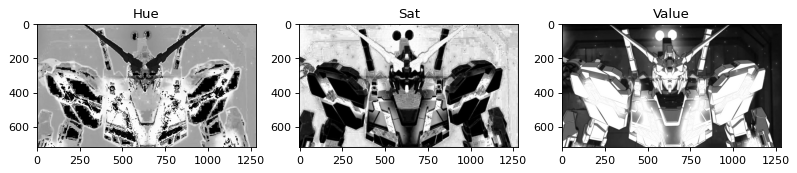

In [ ]:
if filename != 'NO SELECTION YET' :
  hsv= cv2.cvtColor (img, cv2.COLOR_RGB2HSV)
  img_HSV=cv2.split(hsv);
  #display wih pyplot
  fig = plt.figure(figsize=(12, 6), dpi=80)
  ax = fig.add_subplot(131, aspect='auto')
  ax.imshow(img_HSV[0], cmap='gray', vmin=0, vmax=180)
  ax.set_title('Hue')
  ax = fig.add_subplot(132, aspect='auto')
  ax.imshow(img_HSV[1], cmap='gray', vmin=0, vmax=255)
  ax.set_title('Sat')
  ax = fig.add_subplot(133, aspect='auto')
  ax.imshow(img_HSV[2], cmap='gray', vmin=0, vmax=255)
  ax.set_title('Value')